In [34]:
import numpy as np
import pandas as pd
#import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
from sklearn.metrics import r2_score

import seaborn as sn

In [35]:
df=pd.read_csv("datset_phones.csv")

In [36]:
df

,Year,Model,Price,buy
0,2010,1.10,120,no
1,2011,1.20,150,no
2,2011,1.80,160,no
3,2012,2.00,145,no
4,2012,2.10,150,no
5,2012,2.40,160,no
6,2013,2.60,190,no
7,2013,2.80,210,no
8,2014,2.90,220,no
9,2014,3.00,200,no


In [37]:
X=df[['Year','Price']]

In [38]:
Y=df['buy']

In [39]:
import math

In [40]:

def knn(year,price):
    df['diff1']=df['Year']-year
    df['diff2']=df['Price']-price
    df['d1sqr']=df['diff1']**2
    df['d2sqr']=df['diff2']**2
    df['dist']=np.sqrt(df['d2sqr']+df['d1sqr'])
    print(df)
    

In [41]:
knn(2017,340)

    Year  Model  Price  buy  diff1  diff2  d1sqr  d2sqr        dist
0   2010   1.10    120   no     -7   -220     49  48400  220.111335
1   2011   1.20    150   no     -6   -190     36  36100  190.094713
2   2011   1.80    160   no     -6   -180     36  32400  180.099972
3   2012   2.00    145   no     -5   -195     25  38025  195.064092
4   2012   2.10    150   no     -5   -190     25  36100  190.065778
5   2012   2.40    160   no     -5   -180     25  32400  180.069431
6   2013   2.60    190   no     -4   -150     16  22500  150.053324
7   2013   2.80    210   no     -4   -130     16  16900  130.061524
8   2014   2.90    220   no     -3   -120      9  14400  120.037494
9   2014   3.00    200   no     -3   -140      9  19600  140.032139
10  2015   3.10    210   no     -2   -130      4  16900  130.015384
11  2015   3.20    215  yes     -2   -125      4  15625  125.015999
12  2016   3.30    220  yes     -1   -120      1  14400  120.004167
13  2016   3.40    260   no     -1    -80      1

In [42]:
def knn_classify(year,price,k):
    # df['diff1']=df['Year']-year
    # df['diff2']=df['Price']-price
    # df['d1sqr']=df['diff1']**2
    # df['d2sqr']=df['diff2']**2
    df['distance']=np.sqrt(np.square(df['Year']-year)+np.square(df['Price']-price))
    top_k = df.nsmallest(k, 'distance')
    prediction = top_k['buy'].value_counts().head(1).index[0]
    return prediction

In [43]:
print(df['buy'].value_counts().head(1).index[0])

no


In [44]:
knn_classify(2017,340,5)

'yes'

In [45]:
knn_classify(2023,420,5)

'yes'

In [46]:
knn_classify(2016,200,5)

'no'

In [47]:
knn_classify(2016,200,7)

'no'

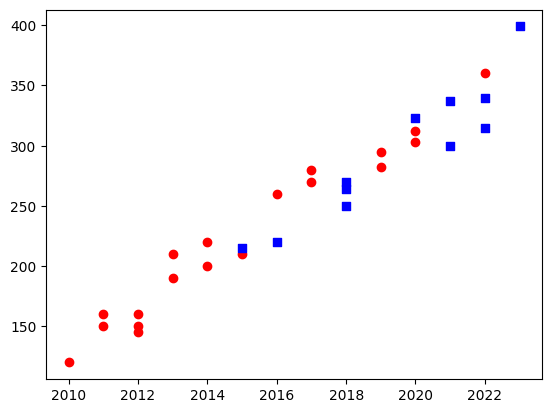

In [57]:
# create a dataframe with two columns named 'x' and 'y'
# create a scatter plot of the points in the dataframe
cols={'yes':'b','no':'r'}
mark={'yes':'s','no':'o'}
fig,ax=plt.subplots()
for i,row in df.iterrows():
    ax.scatter(x=row['Year'], y=row['Price'],  color=cols[row['buy']],marker=mark[row['buy']])

# show the plot
plt.show()

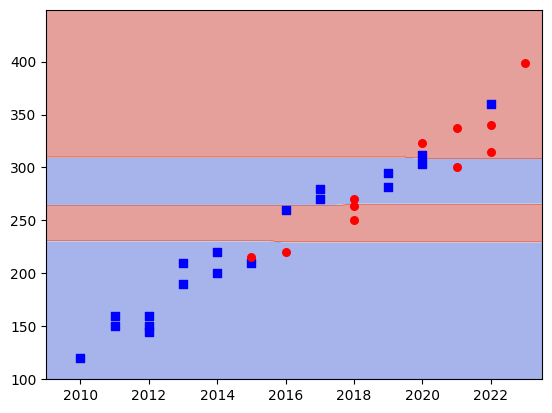

In [ ]:
k=5
xx, yy = np.meshgrid(np.arange(2009, 2024, 0.5), np.arange(100, 450, 1))
zz = np.array([knn_classify(x, y,k)=='yes' for x, y in zip(xx.ravel(), yy.ravel())])
zz = zz.reshape(xx.shape)
# print(zz)
fig, ax = plt.subplots()
ax.contourf(xx, yy, zz, cmap='coolwarm', alpha=0.5)

colors = {'yes': 'red', 'no': 'blue'}
markers = {'yes': 'o', 'no': 's'}
for i, row in df.iterrows():
    ax.scatter(row['Year'], row['Price'], c=colors[row['buy']], marker=markers[row['buy']], s=30)
plt.show()